In [736]:
# 참고

# https://emilkwak.github.io/pandas-dataframe-settingwithcopywarning
# https://yganalyst.github.io/data_handling/Pd_11/
# https://haloaround.tistory.com/260
# https://stml.tistory.com/25
# https://riptutorial.com/ko/pandas/example/5621/dataframe%EC%9D%98-%EC%97%B4-%EC%82%AD%EC%A0%9C
# https://kanoki.org/2019/03/23/pandas-rename-and-reorder-columns/
# https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
# https://m.blog.naver.com/PostList.nhn?blogId=youji4ever
# https://m.blog.naver.com/youji4ever/221712578078

In [737]:
# df 가져오기

import numpy as np
import pandas as pd
naver = pd.read_csv('./data/naver.csv')
bluer = pd.read_csv('./data/bluer.csv')
mango = pd.read_csv('./data/mango.csv')
dining = pd.read_csv('./data/dining.csv')
menu = pd.read_csv('./data/menu.csv')

In [738]:
# 컬럼명 통합

naver = naver.rename({'name':'fullname','rating':'n_rating','thumbnail':'img'}, axis=1)
bluer = bluer.rename({'name':'fullname','ribbonType':'b_rating'}, axis=1)
mango = mango.rename({'name':'fullname','cusine_code':'category', 'rating':'mg_rating', 'thumbnail':'img'}, axis=1)
dining = dining.rename({'name':'fullname','address':'addr', 'score':'d_rating'}, axis=1)
menu = menu.rename({'name':'fullname','address':'addr', 'rating':'mn_rating', 'rest_type':'category'}, axis=1)

In [739]:
# name 컬럼 생성

naver_ed = naver['fullname'].str.split(' ', expand=True)
bluer_ed = bluer['fullname'].str.split(' ', expand=True)
mango_ed = mango['fullname'].str.split(' ', expand=True)
dining_ed = dining['fullname'].str.split(' ', expand=True)
menu_ed = menu['fullname'].str.split(' ', expand=True)

naver['n_name'] = naver_ed[0]
bluer['b_name'] = bluer_ed[0]
mango['mg_name'] = mango_ed[0]
dining['d_name'] = dining_ed[0]
menu['mn_name'] = menu_ed[0]

In [740]:
# 중복값 제거

naver = naver.drop_duplicates(['id'])
bluer = bluer.drop_duplicates(['id'])
dining = dining.drop_duplicates(['id'])

naver['dong'] = naver['addr'].str.split(' ', expand=True)[2]
bluer['dong'] = bluer['addr'].str.split(' ', expand=True)[2]
mango['dong'] = mango['addr'].str.split(' ', expand=True)[2]
dining['dong'] = dining['addr'].str.split(' ', expand=True)[2]
menu['dong'] = menu['addr'].str.split(' ', expand=True)[2]

naver.drop_duplicates(subset=['n_name', 'tel', 'dong'], keep='first')
bluer.drop_duplicates(subset=['b_name', 'tel', 'dong'], keep='first')
mango.drop_duplicates(subset=['mg_name', 'tel', 'dong'], keep='first')
dining.drop_duplicates(subset=['d_name', 'tel', 'dong'], keep='first')
menu.drop_duplicates(subset=['mn_name', 'tel', 'dong'], keep='first')
print()

In [741]:
# 필요 없는 컬럼 제거

# print('naver: ',list(naver.columns))
# print('bluer: ',list(bluer.columns))
# print('mango: ',list(mango.columns))
# print('dining: ',list(dining.columns))
# print('menu: ',list(menu.columns))

naver.drop(naver.columns[:4], axis='columns', inplace=True)
naver.drop(['reviewcount'], axis='columns', inplace=True)
bluer.drop(bluer.columns[:3], axis='columns', inplace=True)
mango.drop(['review_count'], axis='columns', inplace=True)
dining.drop(dining.columns[0], axis='columns', inplace=True)
dining.drop(['id', 'review_count', 'star', 'zzim'], axis='columns', inplace=True)
menu.drop(['link'], axis='columns', inplace=True)

# print('naver: ',list(naver.columns))
# print('bluer: ',list(bluer.columns))
# print('mango: ',list(mango.columns))
# print('dining: ',list(dining.columns))
# print('menu: ',list(menu.columns))

In [742]:
# df merge [experiment1]

naver['key'] = naver['n_name'] + naver['dong']
bluer['key'] = bluer['b_name'] + bluer['dong']
mango['key'] = mango['mg_name'] + mango['dong']
dining['key'] = dining['d_name'] + dining['dong']
menu['key'] = menu['mn_name'] + menu['dong']

bluer_v2 = bluer[['b_name', 'key', 'b_rating']]
mango_v2 = mango[['mg_name', 'key', 'mg_rating']]
dining_v2 = dining[['d_name', 'key', 'd_rating']]
menu_v2 = menu[['mn_name', 'key', 'mn_rating']]

df = naver.merge(bluer_v2, how='outer', on='key')
df = df.merge(mango_v2, how='outer', on='key')
df = df.merge(dining_v2, how='outer', on='key')
df = df.merge(menu_v2, how='outer', on='key')

In [743]:
df.to_excel('./check.xlsx')

In [ ]:
df['si'] = ''
df['gu'] = ''
df = df[['name', 'fullname', 'tel', 'addr', 'si', 'gu', 'dong', 'category', 'menu', 'bizhour', 'n_rating', 'b_rating', 'mg_rating', 'd_rating', 'mn_rating',
'context', 'microreview', 'priceRange', 'lng', 'lat', 'img']]
df.reset_index(drop=True, inplace=True)

In [670]:
# df append [experiment2]

# df = naver.append([bluer, mango, dining, menu])

# df['si'] = ''
# df['gu'] = ''
# df = df[['name', 'fullname', 'tel', 'addr', 'si', 'gu', 'dong', 'category', 'menu', 'bizhour', 'n_rating', 'b_rating', 'mg_rating', 'd_rating', 'mn_rating',
# 'context', 'microreview', 'priceRange', 'lng', 'lat', 'img']]
# df.reset_index(drop=True, inplace=True)

KeyError: "['img', 'priceRange', 'bizhour', 'mg_rating', 'name', 'tel', 'category', 'dong', 'b_rating', 'fullname', 'd_rating', 'addr', 'lat', 'lng'] not in index"

In [586]:
# si, gu 컬럼 채우기

edit = df['addr'].str.split(' ', expand=True)
df['si'] = edit[0]
df['gu'] = edit[1]
df['dong'] = edit[2]

In [587]:
# si, dong, gu 전처리

seoul = df.si.str.startswith('서울', na=False)
df = df[seoul]
df['si'] = '서울특별시'
# list(df['dong'].unique())

In [588]:
len(df)

29190

In [589]:
# ['name', 'tel, 'addr'] 으로 중복값 제거

df = df.drop_duplicates(subset=['name', 'tel', 'dong'], keep='first')

# subway = df[df['name']=='써브웨이']
# subway.to_excel('subway.xlsx')

In [590]:
len(df)

23781

In [591]:
import warnings
warnings.filterwarnings('ignore')

In [629]:
# category 전처리

# 1: 한식, 2: 중식, 3: 일식, 4: 양식, 5: 동남아, 6: 뷔페, 7: 카페/디저트, 8: 바

df.category[df.category==1] = '한식'
df.category[df.category==2] = '중식'
df.category[df.category==3] = '일식'
df.category[df.category==4] = '양식'
df.category[df.category==5] = '동남아'
df.category[df.category==6] = '뷔페'
df.category[df.category==7] = '디저트'
df.category[df.category==8] = '바'

df.category[df.loc[:, 'category'].str.contains('한식', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('중식', na=False)] = '중식'
df.category[df.loc[:, 'category'].str.contains('일식', na=False)] = '일식'
df.category[df.loc[:, 'category'].str.contains('양식', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('동남아', na=False)] = '동남아식'
df.category[df.loc[:, 'category'].str.contains('뷔페', na=False)] = '뷔페'
df.category[df.loc[:, 'category'].str.contains('디저트', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('바', na=False)] = '바'

# df['category'][df.loc[:, 'category'].str.contains('한식', na=False)] = '한식'
# df['category'][df.loc[:, 'category'].str.contains('중식', na=False)] = '중식'
# df['category'][df.loc[:, 'category'].str.contains('일식', na=False)] = '일식'
# df['category'][df.loc[:, 'category'].str.contains('양식', na=False)] = '양식'
# df['category'][df.loc[:, 'category'].str.contains('동남아', na=False)] = '동남아음식'
# df['category'][df.loc[:, 'category'].str.contains('뷔페', na=False)] = '뷔페'
# df['category'][df.loc[:, 'category'].str.contains('디저트', na=False)] = '디저트'
# df['category'][df.loc[:, 'category'].str.contains('바', na=False)] = '바'

# df.category[df['category'].str.contains('한식', na=False)] = '한식'
# df.category[df['category'].str.contains('중식', na=False)] = '중식'
# df.category[df['category'].str.contains('일식', na=False)] = '일식'
# df.category[df['category'].str.contains('양식', na=False)] = '양식'
# df.category[df['category'].str.contains('동남아', na=False)] = '동남아식'
# df.category[df['category'].str.contains('뷔페', na=False)] = '뷔페'
# df.category[df['category'].str.contains('디저트', na=False)] = '디저트'
# df.category[df['category'].str.contains('바', na=False)] = '바'

df.category[df.loc[:, 'category'].str.contains('이탈리아', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('프랑스', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('패밀리', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('브런치', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('미국', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('유럽', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('스페인', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('술', na=False)] = '바'
df.category[df.loc[:, 'category'].str.contains('컵밥', na=False)] = '분식'
df.category[df.loc[:, 'category'].str.contains('테마', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('베이커리', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('남미', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('퓨전', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('아시아', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('인도', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('기타', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('육류', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('베트남', na=False)] = '동남아식'
df.category[df.loc[:, 'category'].str.contains('해물', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('죽', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('양갈비', na=False)] = '중식'
df.category[df.loc[:, 'category'].str.contains('햄버거', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('샌드위치', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('치킨', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('돈가스', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('주점', na=False)] = '바'
df.category[df.loc[:, 'category'].str.contains('카페', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('피자', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('분식', na=False)] = '분식'
df.category[df.loc[:, 'category'].str.contains('스테이크', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('태국', na=False)] = '동남아식'
df.category[df.loc[:, 'category'].str.contains('아프리카', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('터키', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('생활', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('아경면선', na=False)] = '중식'
df.category[df.loc[:, 'category'].str.contains('곱창', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('정육점', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('주꾸미', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('찌개', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('후렌치후라이', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('닭갈비', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('게요리', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('킹크랩요리', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('푸드코트', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('핫도그', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('컨템퍼러리', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('돼지', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('음식점', na=False)] = '한식'

In [630]:
len(df)

23781

In [ ]:
# df.to_excel('check.xlsx')

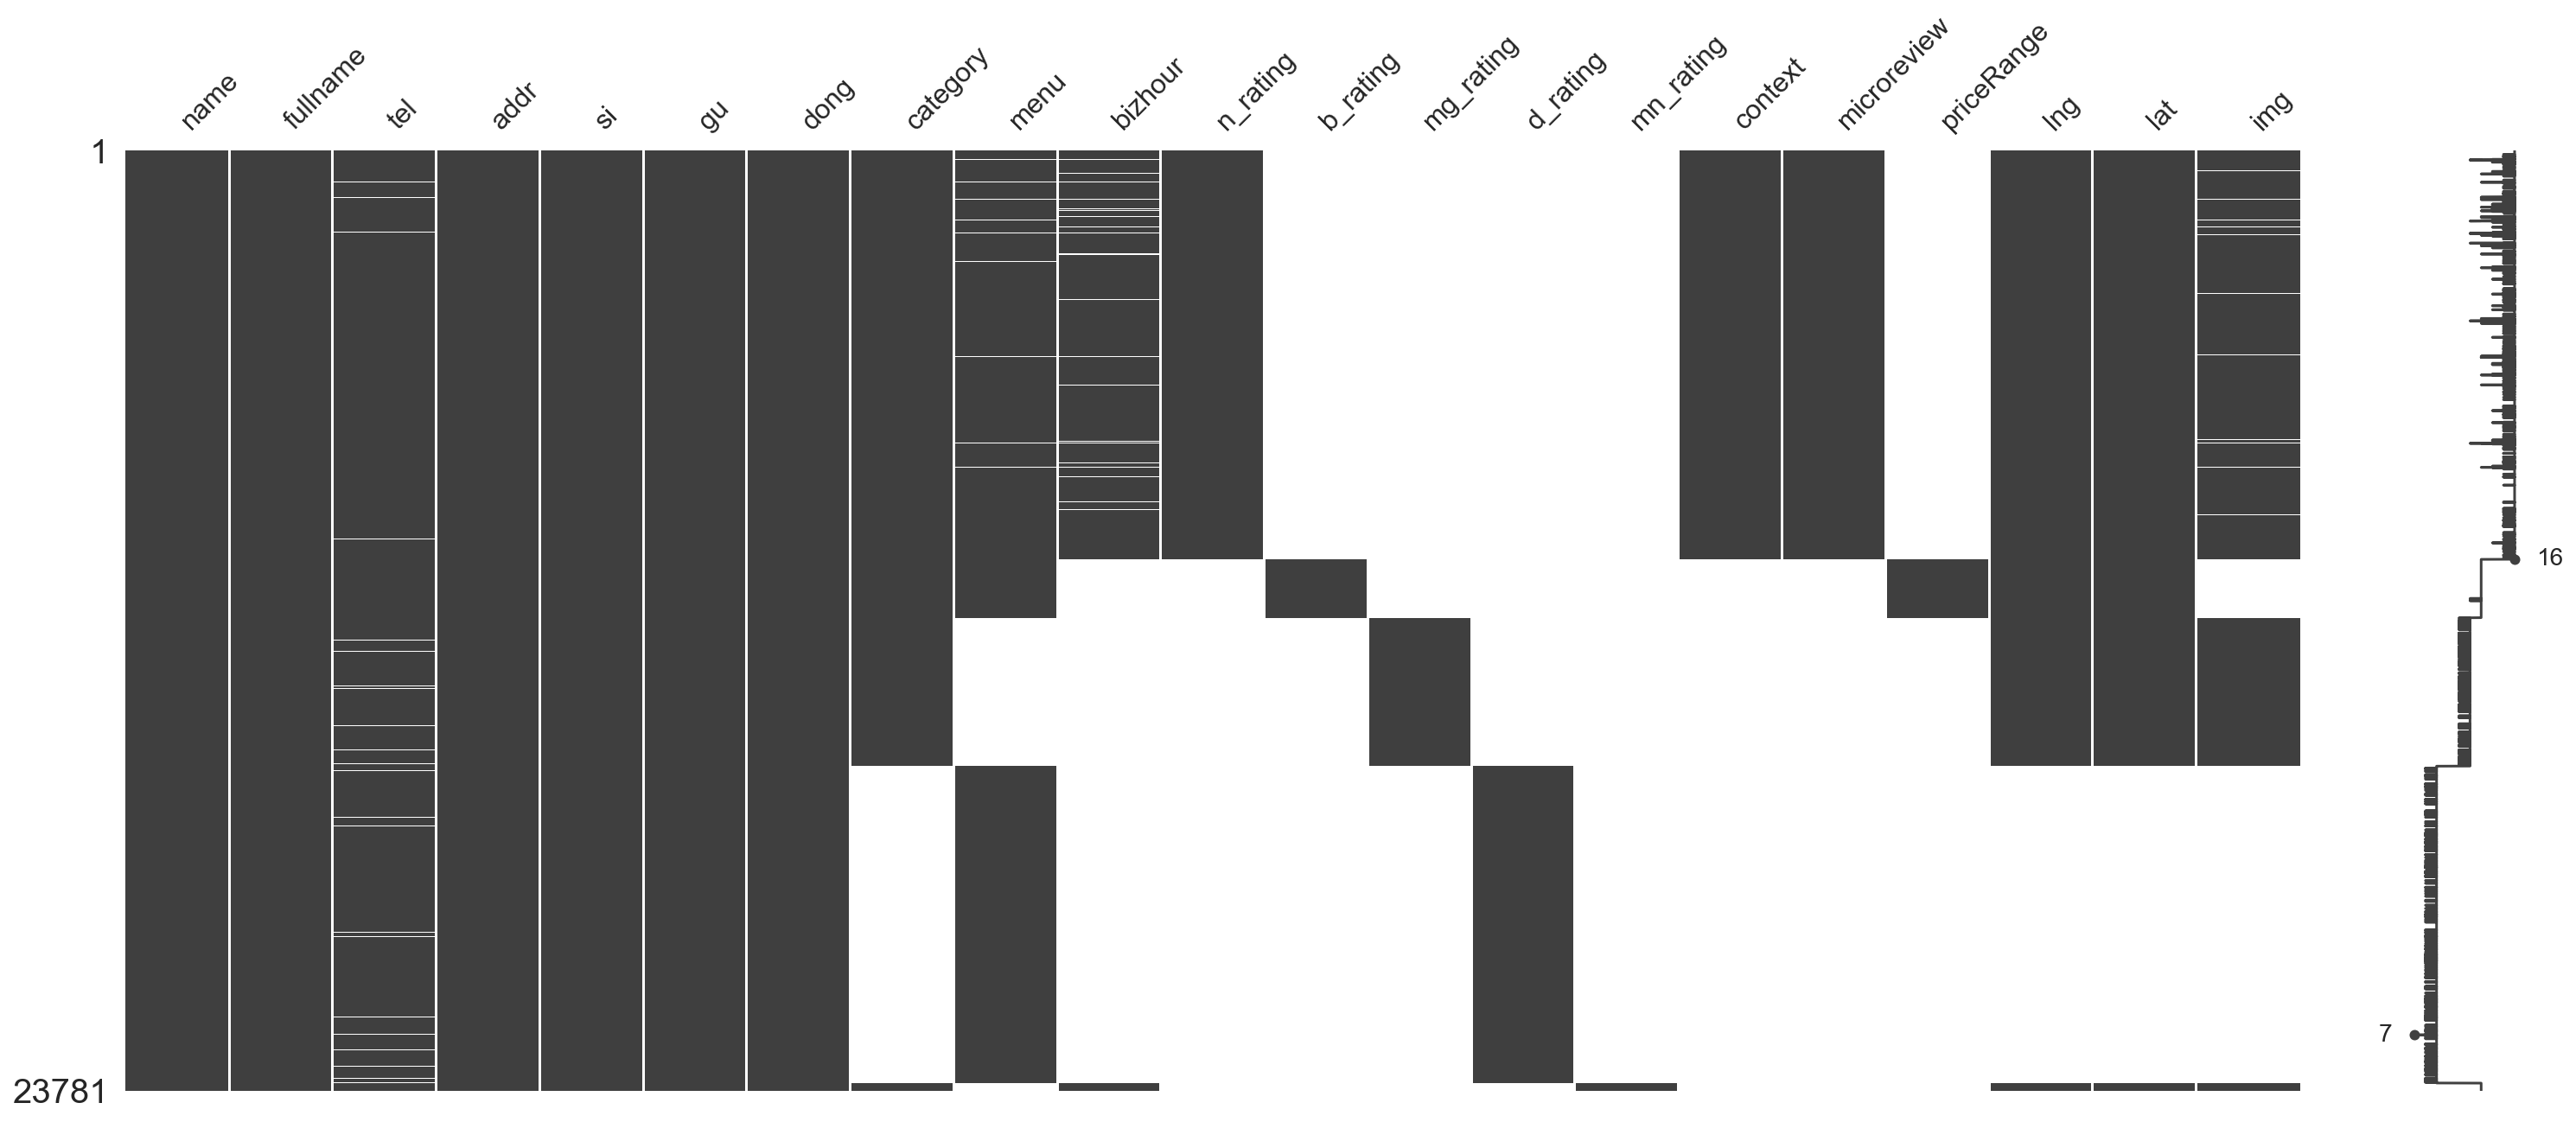

In [632]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.heatmap(df.isnull(), cbar=False)
import missingno as msno
msno.matrix(df)

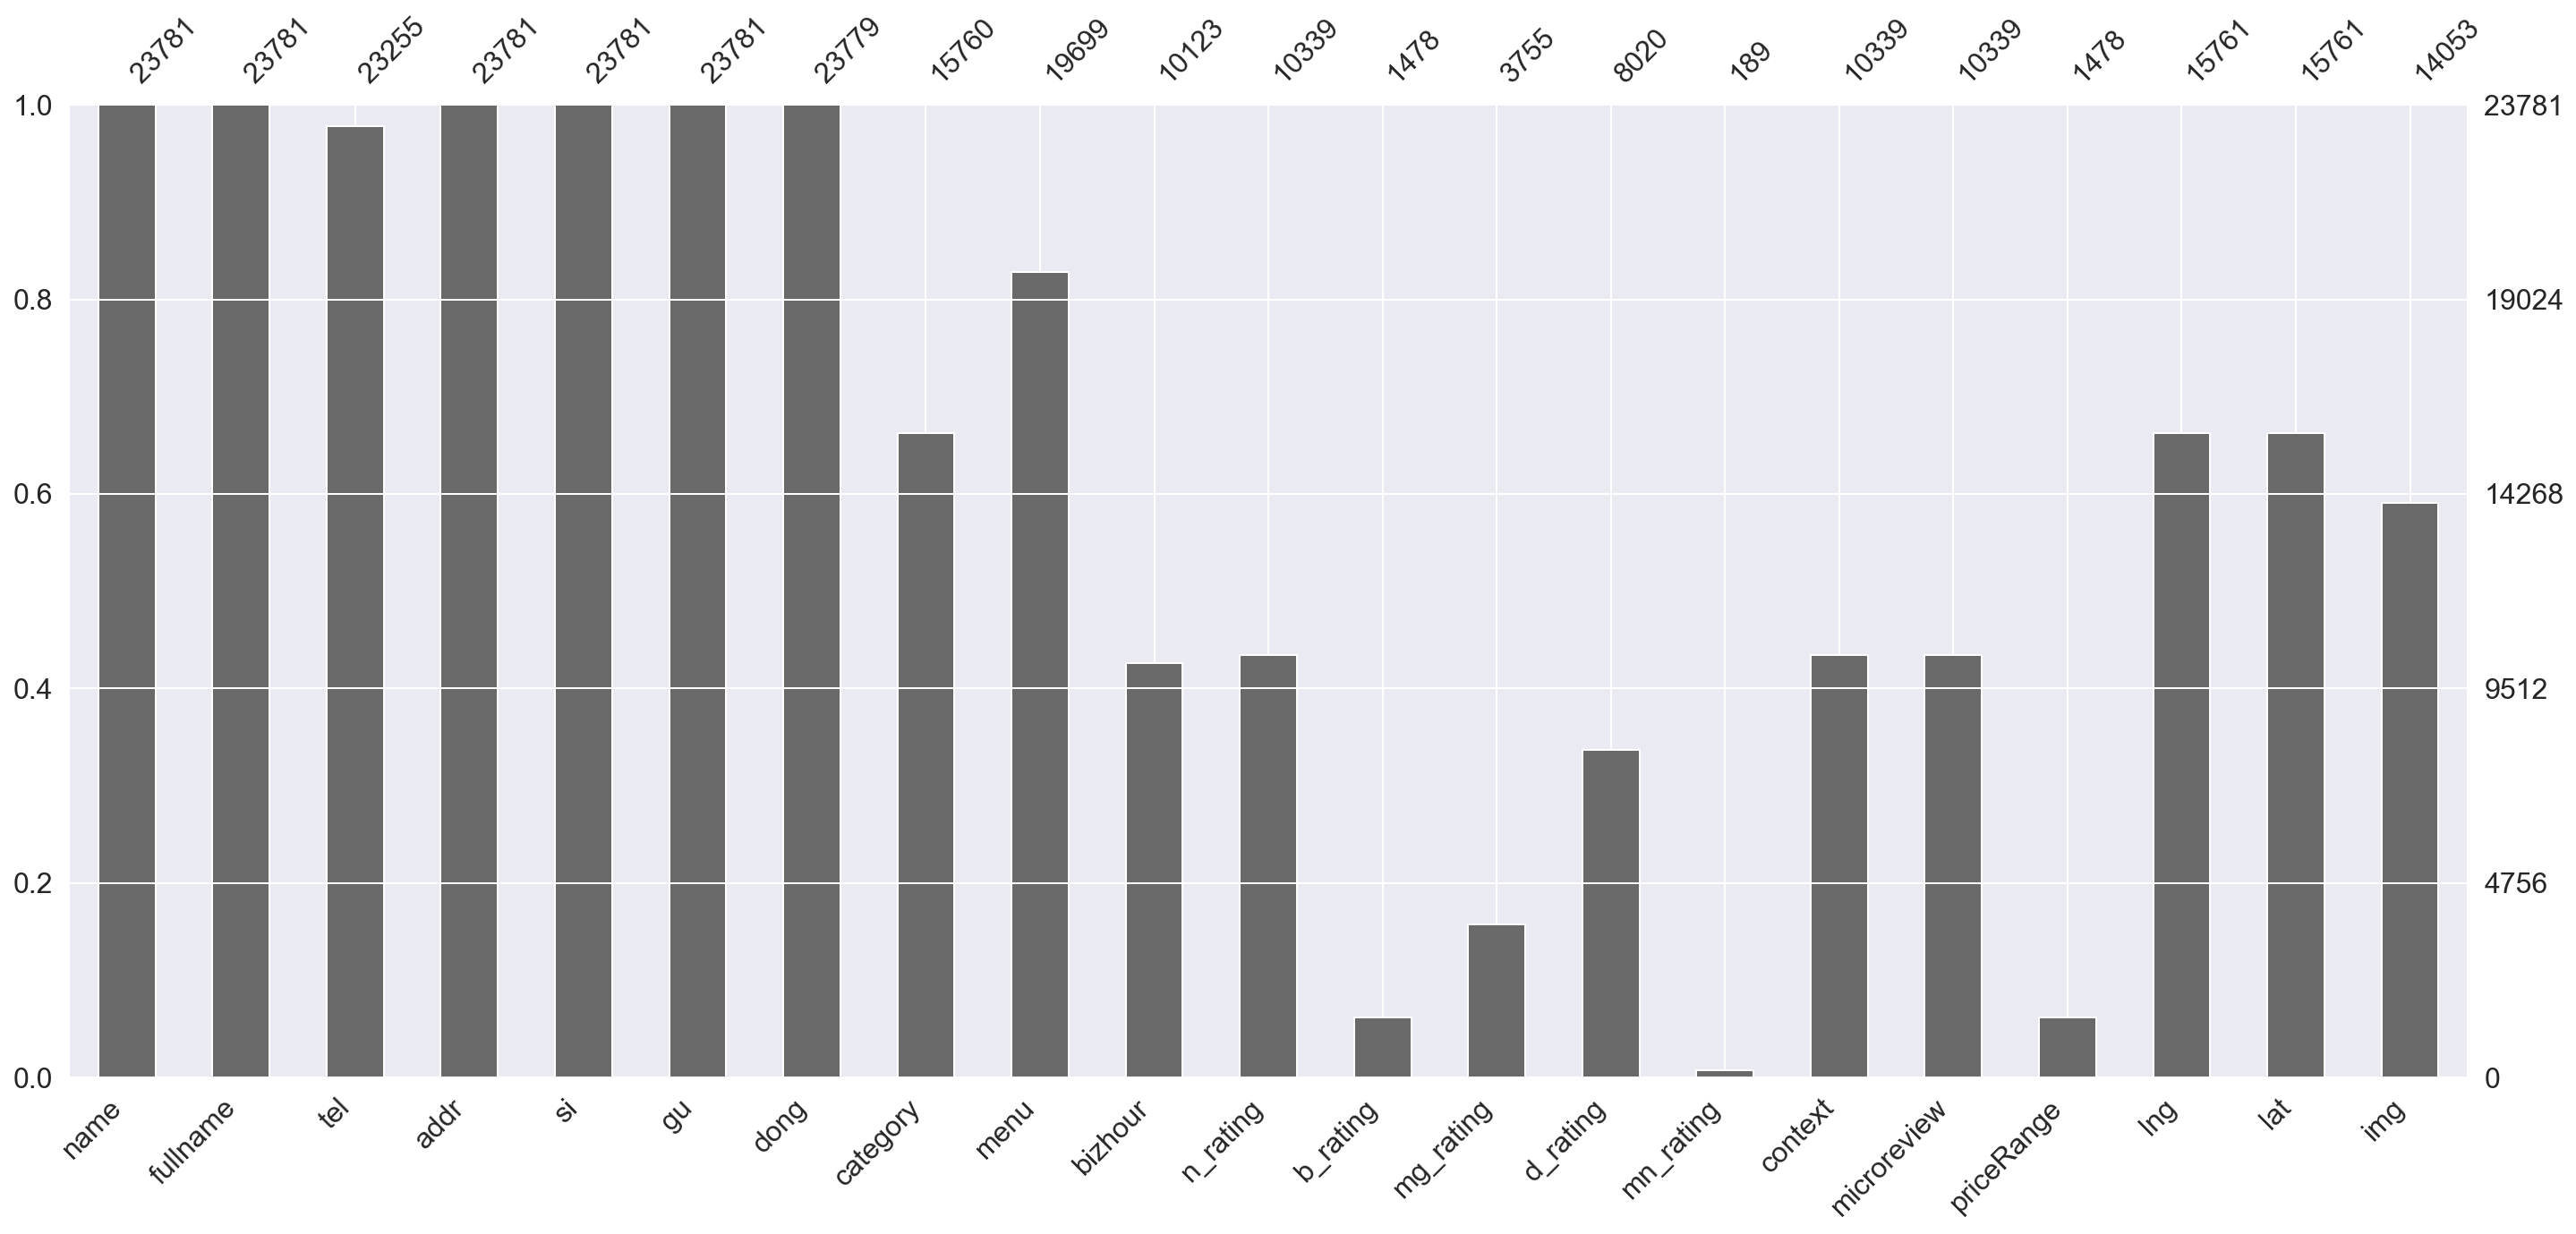

In [633]:
msno.bar(df)

In [ ]:
# https://m.blog.naver.com/PostList.nhn?blogId=youji4ever
# https://m.blog.naver.com/youji4ever/221712578078
# https://blog.naver.com/youji4ever/221791455668

In [ ]:
df.category

In [ ]:
우선 동 + 전화번호로 중복가게 없애고

In [ ]:
category = 1~8로 정리하기
null값은 diningcode인데, menu에서 긁어오면 될듯

다이닝코드는 진지하게 버릴지 말지 고민해야할듯